### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previous numerical exercise.

Per implemetnare il metodo dell'Annelaing ho ripreso il codice dell'algoritmo genetico eliminando la procedura di selezione e di Crossover. Le mosse proposte del processo Monte Carlo sono solamente le mutazioni con una certa probabilità $P_m = 0.1$. 
Quindi partendo da un percorso ne genero uno nuovo  proponendo delle mutazioni e la probabilità di accettazione sarà:
\begin{cases}
e^{-\beta(L(x')-L(x))} & if L(x')>L(x) \\
1 & altrimenti
\end{cases}

Dopo una certa serie di iterazioni a temperatura fissata, si esegue di nuovo un processo Monte Carlo a temperatura diversa partendo però dall'individuo finale della configurazione precedente.

In particolare, nell'algoritmo da me costruito, ho imposto che per ogni temperatura vengano eseguiti Nsteps = 100000 iterazioni, dove un'iterazione è una proposta e accettazione/rifiuto di tipo Metropolis. E, a partire da $\beta$ = 0.1, alla fine degli Nsteps, aggiorno $\beta$ moltiplicandolo per 1.1. Eseguo l'aggiornamento di $\beta$ 100 volte, motivo per cui nel grafico sottostante sull'asse x compare il numero step per T. 

Riporto il grafico di $L^{(2)}$ del miglior percorso in funzione del numero di Step per T. 

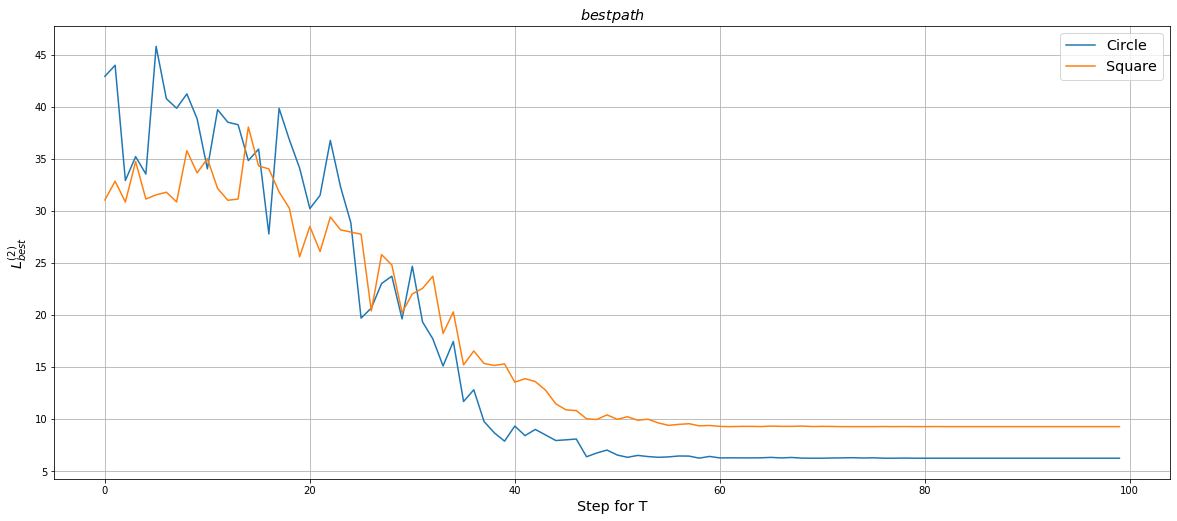

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import matplotlib.gridspec as gridspec

N_gen_c, I_best_c, = np.loadtxt("./annealing/Best_circ.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_r, I_best_r, = np.loadtxt("./annealing/Best_quad.dat", usecols=(0,1), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(N_gen_c,I_best_c,label="Circle")
fig_1.plot(N_gen_r,I_best_r,label="Square")
fig_1.set_title(r'$ best path$',fontsize='x-large')
fig_1.set_xlabel('Step for T',fontsize='x-large')
fig_1.set_ylabel(r'$L^{(2)}_{best}$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

plt.show()

Noto che dopo poche iterazioni $\sim 50$ il sistema ha già raggiunto il minimo.
Nei grafici "best" ottengo che il valore minimo del percorso per circonferenza e quadrato è:

Best_circ = 6.24

Best_quad = 9.27

Riporto ora i due path corrispondenti a queste due lunghezze:

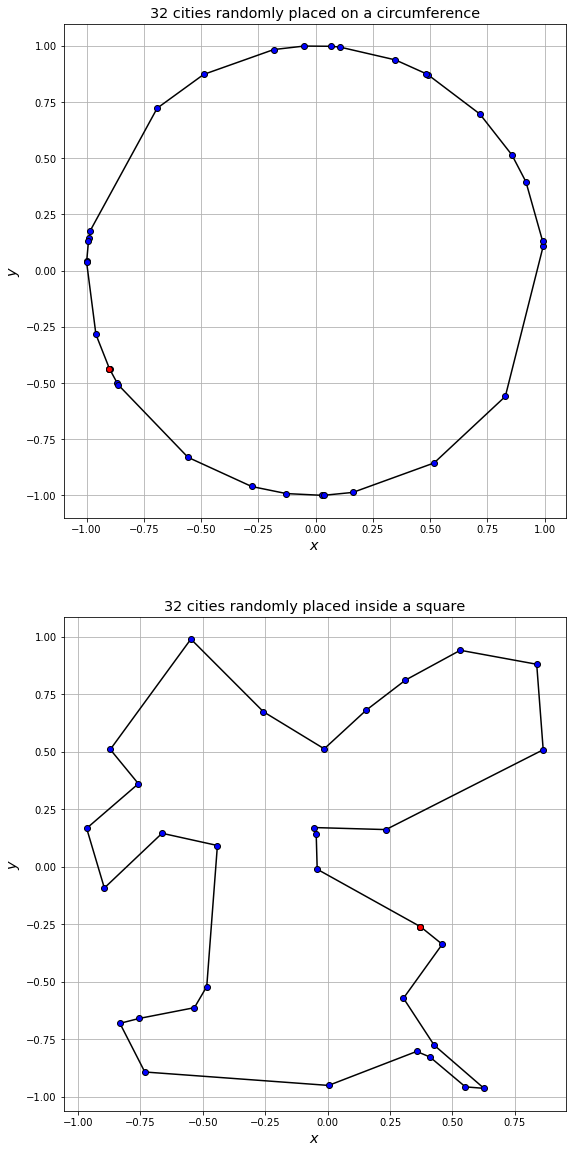

In [3]:
i_c, x_c, y_c= np.loadtxt("./annealing/Maps_circ", usecols=(0,1,2), delimiter='\t', unpack='true')
i_s, x_s, y_s= np.loadtxt("./annealing/Maps_quad", usecols=(0,1,2), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(9,20))
f.subplots_adjust(hspace=0.2, wspace=0.3)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(x_c, y_c, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_1.plot(x_c[0],y_c[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_1.set_title(r'32 cities randomly placed on a circumference',fontsize='x-large')
fig_1.set_xlabel('$x$',fontsize='x-large')
fig_1.set_ylabel(r'$y$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(x_s, y_s, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_2.plot(x_s[0],y_s[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_2.set_title(r'32 cities randomly placed inside a square',fontsize='x-large')
fig_2.set_xlabel('$x$',fontsize='x-large')
fig_2.set_ylabel(r'$y$',fontsize='x-large')

fig_2.grid(True)


plt.show()

Il risultato che ho ottenuto è che nel caso della circonferenza sia l'algoritmo genetico che quello di annealing convergono al medesimo risultato. Mentre per quanto riguarda il quadrato, il risultato ottenuto con l'annealing è di due decimi inferiore rispetto a quello ottenuto con l'algoritmo genetico. Questo può essere giustificato con il fatto che l'algoritmo genetico probabilmente raggiunge un minimo locale, e non quello assoluto.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

Per eseguire il codice in parallelo ho impostato i seguenti parametri: 

numero di core = 4,

numero città N_c = 32,

numero delle popolazioni N_c = 50,

numero di generazioni per ciascun core N_gen = 500,

ogni N_migr = 5 generazioni avviene lo scambio del miglior percorso tra due dei quattro rank.

Di fatto il codice che ho scritto è identico a quello dell'algortimo genetico, decorato con i comandi di inizializzazione della libreria MPI per il calcolo parallelo.
Dopo la funzione *Generazione*, che viene eseguita da ciascun rank, ho aggiunto una funzione *Migration* che seleziona in modo casuale due rank tra quelli utilizzati, e utilizzando MPI_Send e MPI_Recive, scambia i due migliori percorsi tra le popolazioni.
Questo processo viene effettuato 100 volte, ossia N_gen/N_migr volte. 
Alla fine viene calcolato il milgior percorso tra i 4 migliori percorsi di ogni rank. In questo modo ottengo il miglior percorso in assoluto.
Ho utilizzato 4 rank, per ciascuno il generatore di numeri casuali ha "primes" diversi, in modo tale che le popolazioni siano certamente diverse, almeno in partenza.

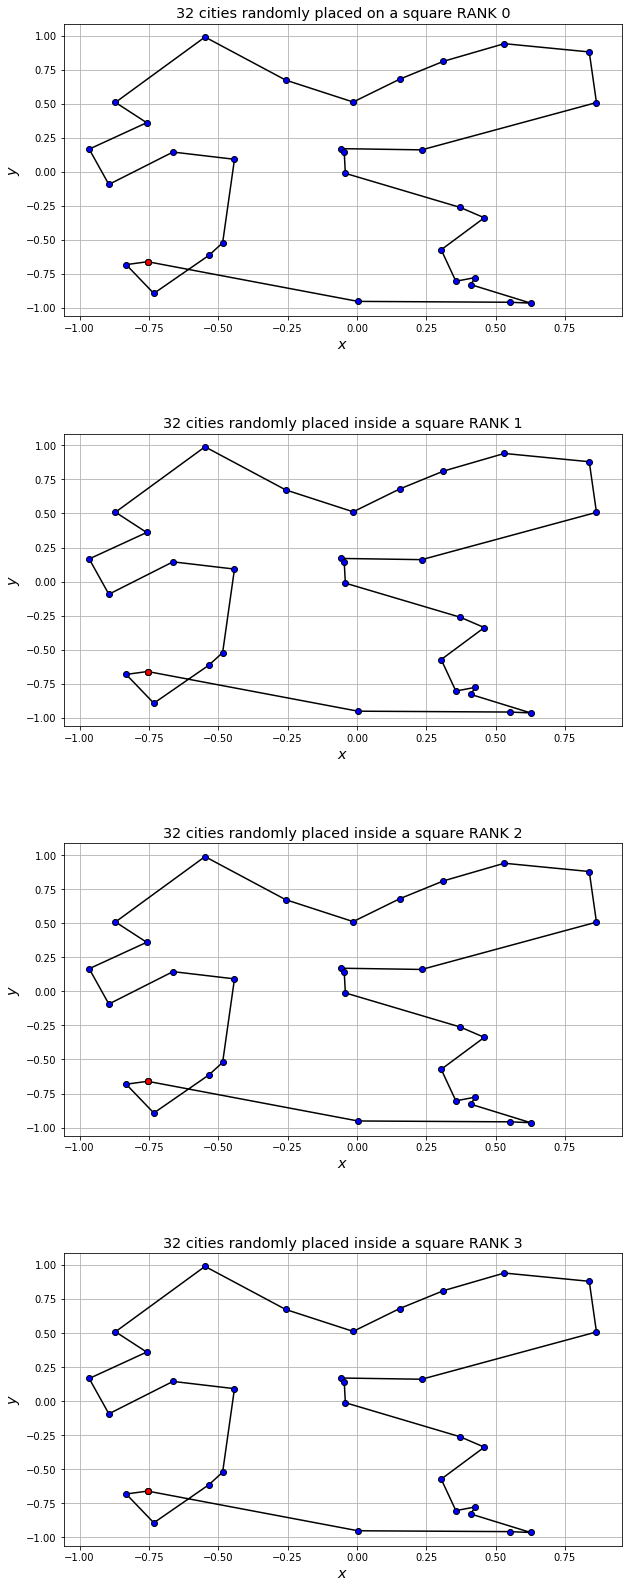

In [4]:
i_0, x_0, y_0= np.loadtxt("./MPI/Maps_0.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
i_1, x_1, y_1= np.loadtxt("./MPI/Maps_1.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
i_2, x_2, y_2= np.loadtxt("./MPI/Maps_2.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
i_3, x_3, y_3= np.loadtxt("./MPI/Maps_3.dat", usecols=(0,1,2), delimiter='\t', unpack='true')

G = gridspec.GridSpec(4,1)
f = plt.figure(figsize=(10,28))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(x_0, y_0, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_1.plot(x_0[0],y_0[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_1.set_title(r'32 cities randomly placed on a square RANK 0',fontsize='x-large')
fig_1.set_xlabel('$x$',fontsize='x-large')
fig_1.set_ylabel(r'$y$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(x_1, y_1, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_2.plot(x_1[0],y_1[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_2.set_title(r'32 cities randomly placed inside a square RANK 1',fontsize='x-large')
fig_2.set_xlabel('$x$',fontsize='x-large')
fig_2.set_ylabel(r'$y$',fontsize='x-large')
fig_2.grid(True)

fig_3=plt.subplot(G[2, 0])
fig_3.plot(x_2, y_2, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_3.plot(x_2[0],y_2[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_3.set_title(r'32 cities randomly placed inside a square RANK 2',fontsize='x-large')
fig_3.set_xlabel('$x$',fontsize='x-large')
fig_3.set_ylabel(r'$y$',fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[3, 0])
fig_4.plot(x_3, y_3, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_4.plot(x_3[0],y_3[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_4.set_title(r'32 cities randomly placed inside a square RANK 3',fontsize='x-large')
fig_4.set_xlabel('$x$',fontsize='x-large')
fig_4.set_ylabel(r'$y$',fontsize='x-large')
fig_4.grid(True)

plt.show()

Ogni rank produce lo stesso percorso, nonostante ciascuno parta con una popolazione differente, dato che i *Primes* scelti per inizializzare il generatore Random di ogni rank sono diversi.

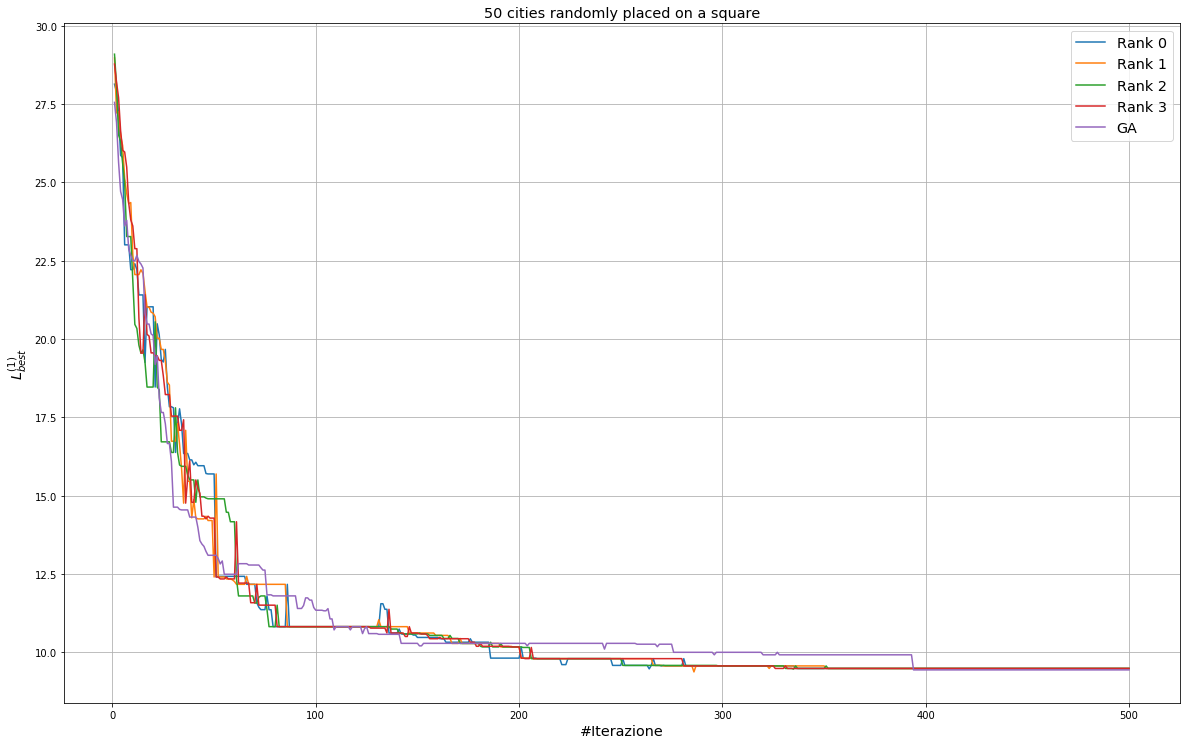

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import matplotlib.gridspec as gridspec

N_it0, I_best0 = np.loadtxt("./MPI/Best_0.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_it1, I_best1 = np.loadtxt("./MPI/Best_1.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_it2, I_best2 = np.loadtxt("./MPI/Best_2.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_it3, I_best3 = np.loadtxt("./MPI/Best_3.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_it4, I_best4 = np.loadtxt("../Es09/Genetic_algorithm/Best_quad.dat", usecols=(0,1), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(20,30))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(N_it0,I_best0,label="Rank 0")
fig_1.plot(N_it1,I_best1,label="Rank 1")
fig_1.plot(N_it2,I_best2,label="Rank 2")
fig_1.plot(N_it3,I_best3,label="Rank 3")
fig_1.plot(N_it4,I_best4,label="GA")

fig_1.set_title(r'50 cities randomly placed on a square',fontsize='x-large')
fig_1.set_xlabel('#Iterazione',fontsize='x-large')
fig_1.set_ylabel('$L^{(1)}_{best}$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

plt.show()

Quello che ottengo è che tutti i rank alla fine dell'esecuzione dell'algoritmo convergono alla stesso percorso e quindi alla stessa lunghezza percorsa dal commesso. 
Inoltre il valore ottenuto è pari a 9.49.
Quindi in ordine decrescente, i risultati che ho ottenuto sono:

Best_quad Annealing = 9.27

Best_quad GA semplice = 9.44

Best_quad GA MPI = 9.49.

Perciò concludo che l'utilizzo del calcolo parallelo non migliora significativamente le prestazioni di ottimizzazione nel problema da me affrontato. Sembra che ancora che l'algoritmo si fermi ad un minimo locale, senza riuscire a raggiungere il valore minore della lunghezza del percorso ottenuto con Annealing.